In [20]:
%reset

# Generate Training Data

### Generate Clean Filters

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import torch

import importlib
import sys
sys.path.append('../Functions/')
import electrical as EE
importlib.reload(EE)
import electrical_sim as EE_sim
importlib.reload(EE_sim)


# HyperCube Sampling
d = 3       # number of dimensions (center_freq, frac_BW, ripple_dB)
m = 1000    # total number of samples

sampler = qmc.LatinHypercube(d=d)
unit_sample = sampler.random(n=m)

                # center_freq, frac_BW, ripple_dB
lower_bnd = np.array([1e9, 0.1, 0.1])
upper_bnd = np.array([4e9,  3, 2.99])
scaled_sample = qmc.scale(unit_sample, lower_bnd, upper_bnd)   # same shape



tensor_designs = torch.empty((m, 10))


# Generate Clean Filters
for r in range(m):

    ripple_dB = scaled_sample[r, 2]
    freq_center = scaled_sample[r, 0]
    frac_BW = scaled_sample[r, 1]

    tensor_designs[r,:] = EE.generate_BP( filter_style="chebyshev", order=5, ripple_dB=ripple_dB, freq_center=freq_center, frac_BW=frac_BW ).elements_2_tensor()



### Simulate Filters

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import qmc
import torch

import importlib
import sys
sys.path.append('../Functions/')
import electrical as EE
importlib.reload(EE)
import electrical_sim as EE_sim
importlib.reload(EE_sim)



# device = "cuda"
device = "cpu"

filter_simulator = EE_sim.LadderS21(n_pts=10000).to(device)   # use "cpu" for CPU
tensor_designs_CUDA = tensor_designs.to(device)

data_S21_dB_CUDA = filter_simulator( tensor_designs_CUDA )


s21_db = data_S21_dB_CUDA.to("cpu").numpy()

Error in callback <function _draw_all_if_interactive at 0x0000028BFF64EC00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

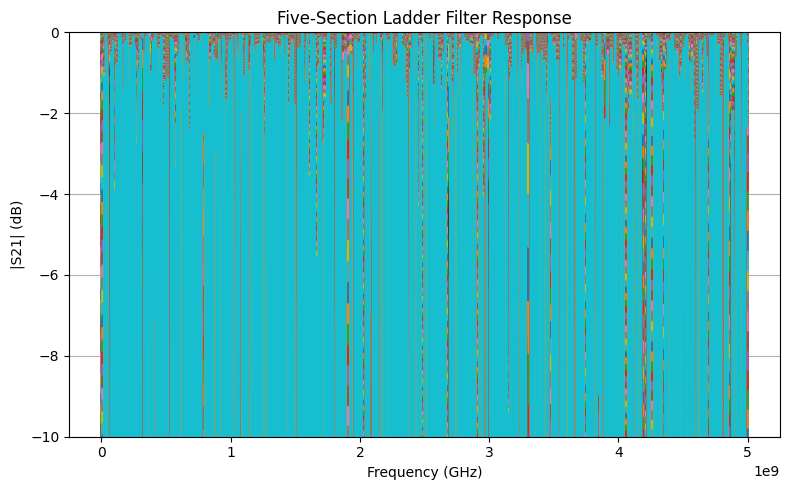

In [ ]:


# Plot
freq = np.linspace(0, 5e9, 10000)
plt.figure(figsize=(8, 5))
plt.plot(freq, s21_db)
# plt.xlim(2.1e9, 2.7e9)
# plt.ylim(-60, 0)
plt.ylim(-10, 0)
plt.xlabel("Frequency (GHz)")
plt.ylabel("|S21| (dB)")
plt.title("Five-Section Ladder Filter Response")
plt.grid(True)
plt.tight_layout()